In [1]:
import cv2
import numpy as np
MIN_ANGLE_DIFF = 10
W_SIZE = 35
import matplotlib.pyplot as plt

# from edge_searching import *
from edge_searching_psuedo import *
from curve_fitting import *

In [2]:

impath = '/home/pronton/SeAH/data/cam4_20230907_143145/'
img_paths = [impath + str(idx) + '.jpg' for idx in list(range(350,400,10))]
print(img_paths)

['/home/pronton/SeAH/data/cam4_20230907_143145/350.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/360.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/370.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/380.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/390.jpg']


In [3]:
img = cv2.imread('/home/pronton/SeAH/data/cam4_20230907_143145/360.jpg')
inner_segs, outer_segs = sliding_window(img, debug=False)

272 110 307 75
275 101 310 66
277 31 312 -4
not valid mask


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


272 110 307 75
275 101 310 66
277 31 312 -4
not valid mask


/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed w

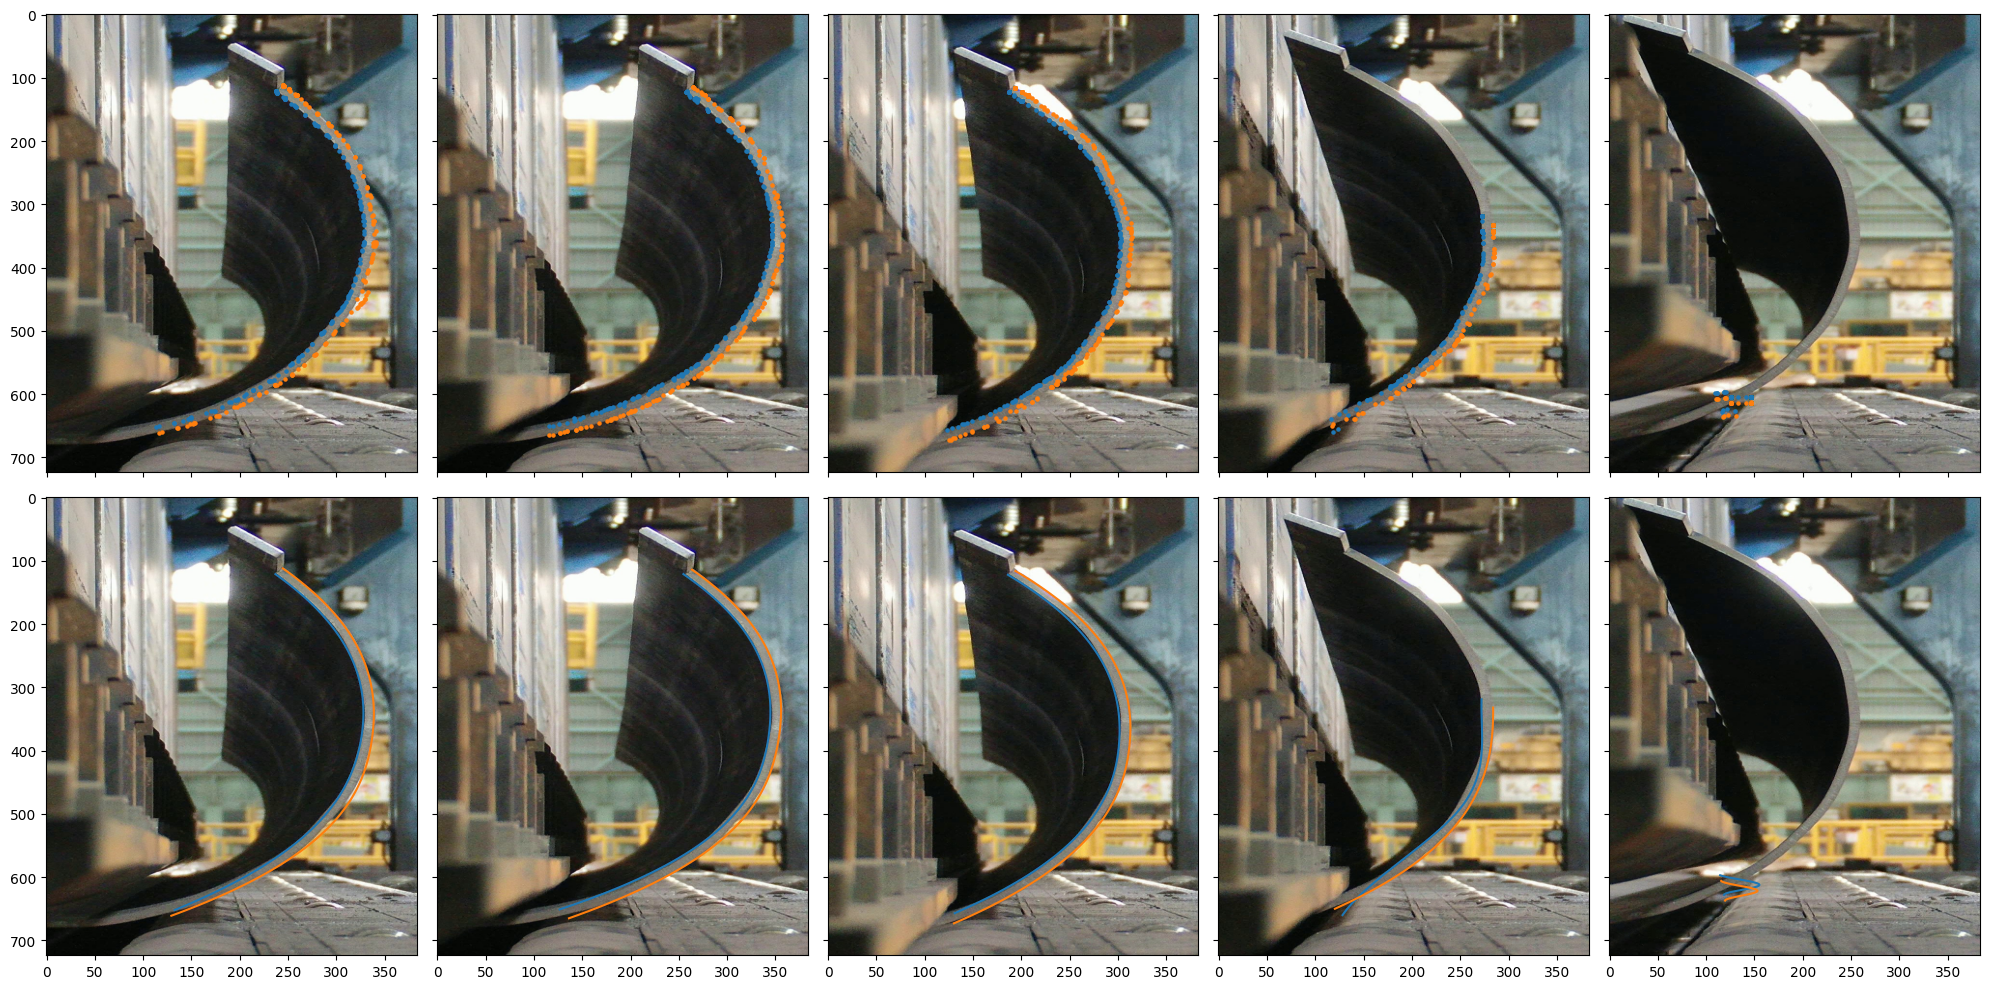

In [4]:
n_rows = len(img_paths)
fig, aux = plt.subplots(nrows=2, ncols=n_rows, sharex=True, sharey=True, figsize=(20, 10))

print(aux[0])

for i in range(0, n_rows, 1):
    # slide window
    img = cv2.imread(img_paths[i]) # img = cv2.imread(argv[1])
    inner_segs, outer_segs = sliding_window(img, debug=False)
    scale = .5
    img = cv2.resize(img, (0,0), fx = scale, fy = scale)

    # curve fitting
    segs = np.array(inner_segs)
    y = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    X = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[0][i].imshow(img[:,:,::-1],  aspect="auto")
    aux[0][i].scatter(y, X, s = 5)
    model = curve_fit(X, y)
    X_test, y_pred = predict_curve(X,y,model)
    aux[1][i].plot(y_pred, X_test )

    segs = np.array(outer_segs)
    y = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    X = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[0][i].scatter(y, X, s = 5)
    model = curve_fit(X, y)
    X_test, y_pred = predict_curve(X,y,model)
    aux[1][i].plot(y_pred, X_test)
    aux[1][i].imshow(img[:,:,::-1],  aspect="auto")
    fig.tight_layout()


In [ ]:
segs = np.array(outer_segs)
y = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
X = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
plt.scatter(y, X, s = 5)
model = curve_fit(X, y)
X_test, y_pred = predict_curve(X,y,model)
plt.plot(y_pred, X_test)
plt.imshow(img[:,:,::-1],  aspect="auto")
fig.tight_layout()

In [ ]:
n_rows = len(img_paths)
fig, aux = plt.subplots(nrows=n_rows, ncols=2, sharex=True, sharey=True, figsize=(5, 15))

print(aux[0])

for i in range(0, n_rows, 1):
    # slide window
    img = cv2.imread(img_paths[i]) # img = cv2.imread(argv[1])
    inner_segs, outer_segs = sliding_window(img, debug=False)
    scale = .5
    img = cv2.resize(img, (0,0), fx = scale, fy = scale)

    # curve fitting
    segs = np.array(inner_segs)
    X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[i][0].imshow(img[:,:,::-1],  aspect="auto")
    aux[i][0].scatter(X, y, s = 5)
    model = curve_fit(X, y, SplineTransformer(n_knots=4, degree=3))
    X_test, y_pred = predict_curve(X,y,model)
    aux[i][1].plot(X_test, y_pred, )

    segs = np.array(outer_segs)
    X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[i][0].scatter(X, y, s = 5)
    model = curve_fit(X, y, SplineTransformer(n_knots=4, degree=3))
    X_test, y_pred = predict_curve(X,y,model)
    aux[i][1].plot(X_test, y_pred)
    aux[i][1].imshow(img[:,:,::-1],  aspect="auto")
    fig.tight_layout()

In [ ]:
segs = np.array(inner_segs)
X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
model = curve_fit(X, y)
X_test, y_pred = predict_curve(X,y,model)
ax = plt.scatter(X_test, y_pred).axes
plt.xlim([0,383])
plt.ylim([0,723])
ax.invert_yaxis()